# Alibaba Group Holding Ltd (BABA) | Stock Market Prediction

### <span style="color:darkred">Disclaimer</span>


- <span style="color:darkred">This project doesn't offer investment advice or recommendations.</span>
- <span style="color:darkred">The main goal is to use data-driven methods to provide insights and predictions.</span>
- <span style="color:darkred">Please be aware that all investment decisions involve risk, do your own research, and consider your own financial situation and risk tolerance before making any investment choices.</span>


1. **[Introduction](#1.)**

    - 1.1. [Understanding the Problem](#1.1.)


2. **[Exploratory Data](#2.)**
    
    - 2.1. [Data Understanding](#2.1.)


3. **[Data Preprocessing](#3.)**
    
    - [3.1. Data Cleaning](#3.1.)
        - 3.1.1. [Drop Ticker column from Baba DataFrame](#3.1.1.)
        - 3.1.2. [Select a subset of DataFrame and convert to NumPy](#3.1.2.)
        - 3.1.3. [Feature Scaling on Dataset using MinMaxScaler](#3.1.3.)


4. **[Modeling: Stock Market Prediction](#4.)**
    
    - 4.1. [Creating Dataset for Modeling](#4.1.)
    - 4.2. [Model Building using LSTM (Long Short-Term Memory)](#4.2.)
    - 4.3. [EarlyStopping](#4.3.)
    - 4.4. [Column Extraction](#4.4.)
    - 4.5. [Visualization](#4.5.)
    - 4.6. [Evaluation Metrics](#4.6.)
    - 4.7. [Model Performance Evaluation](#4.7.)


5. **[Conclusions](#5.)**


6. **[Future Improvements](#6.)**


7. **[Closure](#7.)**


8. **[Acknowledgments](#8.)**

### 1. Introduction<a name="1."></a>

### 1.1. Understanding the Problem<a name="1.1."></a>

In this stock price prediction project for Alibaba Group Holding Ltd (BABA). I aim to forecast the future stock prices based on historical data. By utilizing a LSTM (Long Short-Term Memory) neural network model, we can make predictions and evaluate the accuracy of the model's performance. Here are the key questions to address:

- Q1: How accurately can we predict BABA stock prices using the available data?
- Q2: How well does the predictive model perform in identifying upward or downward trends in stock prices?
- Q3: Can we optimize the predictive model to improve its accuracy and reliability?

To measure success of this project, I'll consider following criteria:

- Clear answers to all questions listed related to BABA stock price prediction.
- Development machine learning model that can predict BABA stock prices based on available data.
- Improvement on predictive model to achieve better accuracy in predicting stock prices.
- Evaluation model performance in identifying BABA stock prices.
- Summarize model effectiveness and recommendations to improve the prediction accuracy.

By obtain valuable insights and develop reliable predictive model, we'll aim to make informed decisions in forecasting stock prices.

### 2. Exploratory Data

### 2.1. Data Understanding

In [1]:
# Traverse the directory tree from '/kaggle/input'
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/baba-stock-market-datasets/BABA.csv


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read BABA.csv & create a DataFrame named 'baba'
baba = pd.read_csv('/kaggle/input/baba-stock-market-datasets/BABA.csv')

# Print the first five rows 'baba' DataFrame
baba.head()

,ticker,date,open,high,low,close
0,BABA,2014-09-19,92.70,99.70,89.95,93.89
1,BABA,2014-09-22,92.70,92.95,89.50,89.89
2,BABA,2014-09-23,88.94,90.48,86.62,87.17
3,BABA,2014-09-24,88.47,90.57,87.22,90.57
4,BABA,2014-09-25,91.09,91.50,88.50,88.92


In [4]:
# Print the last five rows 'baba' DataFrame
baba.tail()

,ticker,date,open,high,low,close
2206,BABA,2023-06-27,86.82,87.615,86.715,87.13
2207,BABA,2023-06-28,85.75,85.750,84.380,84.59
2208,BABA,2023-06-29,83.39,83.990,83.000,83.55
2209,BABA,2023-06-30,83.23,84.230,83.010,83.35
2210,BABA,2023-07-03,84.87,85.635,84.000,84.07


In [5]:
# Print information about 'baba' DataFrame
baba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  2211 non-null   object 
 1   date    2211 non-null   object 
 2   open    2211 non-null   float64
 3   high    2211 non-null   float64
 4   low     2211 non-null   float64
 5   close   2211 non-null   float64
dtypes: float64(4), object(2)
memory usage: 103.8+ KB


In [6]:
# Print descriptive statistics of the numerical columns in the 'baba' DataFrame
baba.describe()

,open,high,low,close
count,2211.000000,2211.000000,2211.000000,2211.000000
mean,144.733478,146.522753,142.647750,144.595061
std,59.385594,59.891591,58.664406,59.327641
min,57.300000,58.650000,57.200000,57.390000
25%,89.560000,90.880000,88.030000,89.340000
50%,139.380000,141.900000,136.040000,139.080000
75%,186.000000,188.005000,183.845000,185.690000
max,313.500000,319.320000,308.910000,317.140000


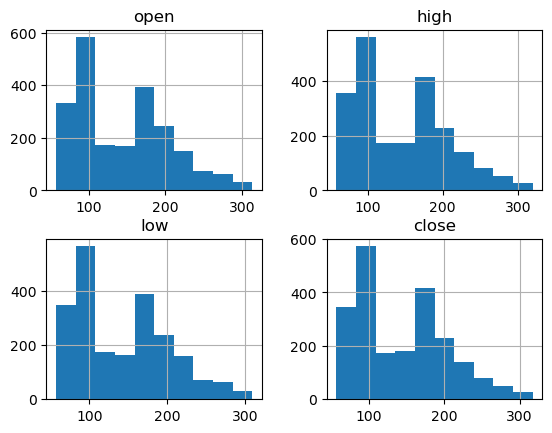

In [7]:
# Print histograms for each numerical column in the 'baba' DataFrame
baba.hist();

In [8]:
# Print tuple represent the number of rows and columns 'baba' DataFrame
baba.shape

(2211, 6)

### 3. Data Preprocessing<a name="3."></a>

### 3.1. Data Cleaning<a name="3.1."></a>

### 3.1.1. Drop Ticker column from Baba DataFrame<a name="3.1.1."></a>

One reason I drop the 'ticker' column from 'baba' dataset because it doesn't provide any useful information for building the predictive model. It only contains the word "BABA" for all the data points, which represents the stock symbol for Alibaba Group Holding Ltd.

Since the entire column has the same value, it does not contribute to any variation or patterns in the data that could be relevant for predicting stock prices. We can simplify the dataset and focus only on the features that have a direct impact on the stock price. This allows us to eliminate any potential noise or unnecessary information.

In [9]:
# Drop 'ticker' column from 'baba' DataFrame
baba = baba.drop('ticker', axis=1)

### 3.1.2. Select a subset of DataFrame and convert to NumPy<a name="3.1.2."></a>

In [10]:
# Selects a subset of the 'baba' DataFrame and converts into a NumPy array
baba_set = baba.iloc[:, 1:2].values

In [11]:
# Check both shapes
baba_set.shape, baba.shape

((2211, 1), (2211, 5))

In [12]:
# Print the first five rows of 'baba_set' numpy array
print(baba_set[:5])
print(baba[:5])

[[92.7 ]
 [92.7 ]
 [88.94]
 [88.47]
 [91.09]]
         date   open   high    low  close
0  2014-09-19  92.70  99.70  89.95  93.89
1  2014-09-22  92.70  92.95  89.50  89.89
2  2014-09-23  88.94  90.48  86.62  87.17
3  2014-09-24  88.47  90.57  87.22  90.57
4  2014-09-25  91.09  91.50  88.50  88.92


In [13]:
# Get the unique values in 'baba_set'
unique_values = np.unique(baba_set)

# Print the unique values
print(unique_values)

[ 57.3   58.16  58.36 ... 311.46 311.75 313.5 ]


In [14]:
# Convert the date column to DateTime format
baba_dates = pd.to_datetime(baba_set[:, 0], errors='coerce')

# Check for missing values in baba_dates
missing_values = pd.isnull(baba_dates)

# Count the number of missing values
missing_count = np.sum(missing_values)

# Print the missing value count
print("Missing value count:", missing_count)

Missing value count: 0


### 3.1.3. Feature Scaling on Dataset using MinMaxScaler<a name="3.1.3."></a>

Preprocessing step that helps bring the features to a similar scale. In this case, the MinMaxScaler scales the values in 'baba_set' between 0 and 1.

In [15]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler with the desired feature range (0 to 1)
sc = MinMaxScaler(feature_range=(0, 1))

# Apply feature scaling on 'baba_set' using the fit_transform() method
baba_set_scaled = sc.fit_transform(baba_set)

In [16]:
# The scaled version of 'baba_set'
baba_set_scaled

array([[0.1381733 ],
       [0.1381733 ],
       [0.12349727],
       ...,
       [0.1018345 ],
       [0.10120999],
       [0.10761124]])

### 4. Modeling: Stock Market Prediction<a name="4."></a>

### 4.1. Creating Dataset for Modeling<a name="4.1."></a>

Create data structure consists of input sequences (x_train) and output values (y_train) for training the model. These steps prepare data in suitable format to train an LSTM model, which takes historical sequences as input and predicts the next timestep.

In [17]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, 1257):
    x_train.append(baba_set_scaled[i-60:i, 0])
    y_train.append(baba_set_scaled[i, 0])

# Converting x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# Print input sequences
x_train

array([[0.1381733 , 0.1381733 , 0.12349727, ..., 0.19434036, 0.18399688,
        0.18501171],
       [0.1381733 , 0.12349727, 0.12166276, ..., 0.18399688, 0.18501171,
        0.19160812],
       [0.12349727, 0.12166276, 0.13188915, ..., 0.18501171, 0.19160812,
        0.18130367],
       ...,
       [0.43118657, 0.44063232, 0.43005464, ..., 0.46440281, 0.46330991,
        0.47068696],
       [0.44063232, 0.43005464, 0.43364559, ..., 0.46330991, 0.47068696,
        0.47790788],
       [0.43005464, 0.43364559, 0.42833724, ..., 0.47068696, 0.47790788,
        0.47014052]])

In [19]:
# Print output values
y_train

array([0.19160812, 0.18130367, 0.19441842, ..., 0.47790788, 0.47014052,
       0.46662763])

In [20]:
# Reshaping the x_train array to have dimensions (1197, 60, 1)
x_train = x_train.reshape(1197, 60, 1)

In [21]:
# Print the shape of the x_train array after reshaping
x_train.shape

(1197, 60, 1)

This new shape indicates we have 1197 samples, each consist 60 time steps, and each time step has 1 feature (stock price).

### 4.2. Model Building using LSTM (Long Short-Term Memory)<a name="4.2."></a>

In [22]:
# Install TensorFlow and specify the version
!pip install -U tensorflow==2.12.0

# Import the TensorFlow library
import tensorflow as tf

# Print the TensorFlow version
tf.__version__

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

'2.12.0'

In [23]:
# Define an object (initialize RNN)
model = tf.keras.models.Sequential()

In [24]:
# Add the first LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# Add a dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Add the second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
# Add a dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Add the third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
# Add a dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Add the fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
# Add a dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [25]:
# Add the output layer
model.add(tf.keras.layers.Dense(units=1))

In [26]:
# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

### 4.3. EarlyStopping<a name="4.3."></a>

Reasons I use EarlyStopping is to to find the optimal balance between model performance and training time while preventing potential overfitting issues. It helps to prevent the model from noise or inconsistent training data, leading to better generalization performance and efficient resource utilization. Ultimately ensures that the model is trained for an optimal number of epochs, saving time and improving model robustness.

In [28]:
# Import the EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
30/30 [==============================] - 8s 140ms/step - loss: 0.0290 - val_loss: 0.0084
Epoch 2/100
30/30 [==============================] - 4s 128ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 3/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 4/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/100
30/30 [==============================] - 4s 129ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 6/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 7/100
30/30 [==============================] - 4s 127ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 8/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 9/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 10/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0012 - val_lo

In [29]:
# Read the test data from the CSV file
test_data = pd.read_csv('/kaggle/input/baba-stock-market-datasets/BABA.csv')

In [30]:
# Check the shape of the 'test_data' DataFrame
test_data.shape

(2211, 6)

In [31]:
# Print information about the 'test_data' DataFrame
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  2211 non-null   object 
 1   date    2211 non-null   object 
 2   open    2211 non-null   float64
 3   high    2211 non-null   float64
 4   low     2211 non-null   float64
 5   close   2211 non-null   float64
dtypes: float64(4), object(2)
memory usage: 103.8+ KB


### 4.4. Column Extraction<a name="4.4."></a>

Extracting the 'close' column from the 'test_data' DataFrame helps us to assess how well the model predict the future stock prices accurately. It allows us to evaluate the performance of the model and make informed decisions based on the comparison between the predicted and actual prices.

In [32]:
# Extract the 'close' column from the 'test_data' DataFrame as the real stock prices
actual_stock_price = test_data.iloc[:, 4].values

In [33]:
# Check the shape of the 'actual_stock_price' DataFrame
actual_stock_price.shape

(2211,)

In [34]:
def get_predicted_stock_prices(baba, test_data, model, sc):
    """
    Get the predicted stock prices using the given training data, test data, model, and scaler.

    Parameters:
    - baba (DataFrame): The training data used to train the model.
    - test_data (DataFrame): The test data containing the time period for which to predict the stock prices.
    - model: The trained LSTM model.
    - sc: The scaler used for feature scaling.

    Returns:
    - predicted_stock_price (ndarray): The predicted stock prices.
    - actual_stock_price (ndarray): The actual stock prices from the test data.
    """

    # Concatenate the 'close' columns of training and test data
    dataset_total = pd.concat((baba['close'], test_data['close']), axis=0)

    # Get the stock prices of the previous 300 days for each day in the test data
    inputs = dataset_total[len(dataset_total) - len(test_data) - 300:].values

    # Reshape the inputs to be a 2D array
    inputs = inputs.reshape(-1, 1)

    # Scale the inputs using the provided scaler
    inputs = sc.transform(inputs)

    # Create the test set
    x_test = []
    for i in range(60, 310):
        x_test.append(inputs[i-60:i, 0])
    
    # Convert the test set to a numpy array
    x_test = np.array(x_test)

    # Reshape the test set to 3D (required for model prediction)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get the predicted stock prices
    predicted_stock_price = model.predict(x_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    return predicted_stock_price, test_data['close'].values[-250:]

# Get the predicted stock prices and the actual stock prices
predicted_stock_price, actual_stock_price = get_predicted_stock_prices(baba, test_data[-250:], model, sc)

print("Predicted stock price:", predicted_stock_price[-5:])
print("Actual stock price:", actual_stock_price[-5:])

8/8 [==============================] - 1s 33ms/step
Predicted stock price: [[89.0787 ]
 [90.60779]
 [92.36202]
 [94.22096]
 [96.06882]]
Actual stock price: [87.13 84.59 83.55 83.35 84.07]


In [35]:
# Obtain the shape of the actual_stock_price array
actual_stock_price.shape

(250,)

### 4.5. Visualization<a name="4.5."></a>

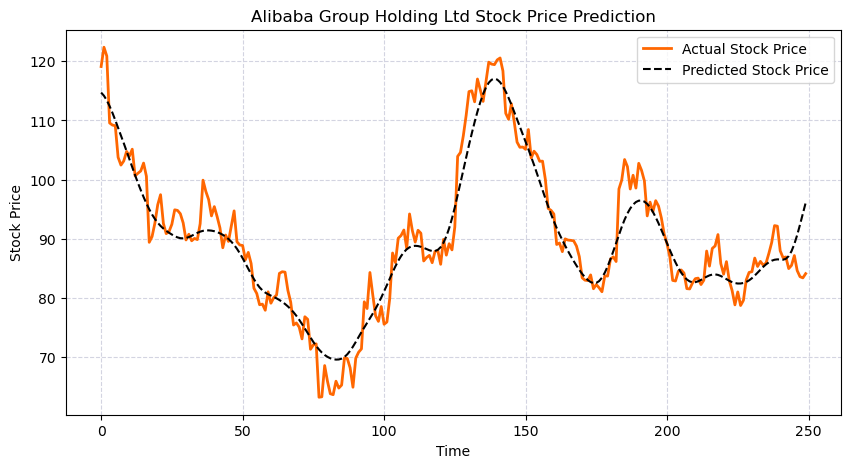

In [36]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the actual stock price in red
plt.plot(actual_stock_price, color='#FF6701', label='Actual Stock Price', linewidth=2)

# Plot the predicted stock price in blue
plt.plot(predicted_stock_price, color='#000000', label='Predicted Stock Price', linestyle='--')

# Add grid lines
plt.grid(color='#D3D4E1', linestyle='--')

# Add title and axis labels
plt.title('Alibaba Group Holding Ltd Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Overall, this visualization shows comparison between actual stock prices and the predicted stock prices. By observing the plot, we can visually assess how well the model predicted the future stock prices. Any similarities or differences between the two lines can be observe further, and provide insights of accuracy.

### 4.6. Evaluation Metrics<a name="4.6."></a>

After visualize model performance, let's evaluate its accuracy using various metrics.

- **Mean Squared Error (MSE):** measures the average squared difference between the predicted and actual stock prices. A lower MSE indicates better accuracy.

- **Root Mean Squared Error (RMSE):** square root of the MSE and provides a measure of the average difference between the predicted and actual prices.

- **Mean Absolute Error (MAE):** calculates the average absolute difference between the predicted and actual prices.

- **Coefficient of Determination (R^2):** measures the proportion of the variance in the actual prices that can be explained by the predicted prices. A value closer to 1 indicates a better fit of the model.

- **Mean Absolute Percentage Error (MAPE):** calculates the average percentage difference between the predicted and actual prices. It provides an understanding of the magnitude of errors relative to the actual prices.

- **Directional Accuracy:** measures the percentage of correctly predicted directions of stock price movement (increase or decrease) compared to the actual directions.

By calculating these metrics, we can assess how well the model performs in predicting the stock prices and can help us understand its effectiveness in making informed decisions.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Get the predicted stock prices and the actual stock prices
predicted_stock_price, actual_stock_price = get_predicted_stock_prices(baba, test_data, model, sc)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(actual_stock_price, predicted_stock_price)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(actual_stock_price, predicted_stock_price)

# Calculate MAPE
mape = mean_absolute_percentage_error(actual_stock_price, predicted_stock_price)

# Calculate Directional Accuracy
actual_direction = np.diff(actual_stock_price.flatten()) > 0
predicted_direction = np.diff(predicted_stock_price.flatten()) > 0
directional_accuracy = np.mean(actual_direction == predicted_direction)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R^2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Directional Accuracy:", directional_accuracy)

8/8 [==============================] - 0s 33ms/step
Mean Squared Error (MSE): 11.655484102748838
Root Mean Squared Error (RMSE): 3.4140129031315682
Mean Absolute Error (MAE): 2.6888480065917966
Coefficient of Determination (R^2): 0.9247920356468325
Mean Absolute Percentage Error (MAPE): 0.029916649046711454
Directional Accuracy: 0.6024096385542169


### 4.7. Model Performance Evaluation<a name="4.7."></a>

This set of performance metrics provides a comprehensive evaluation of the predictive model's accuracy and its ability to capture the underlying patterns in the stock price data:

- **Mean Squared Error (MSE):** the average squared difference between the predicted and actual prices is approximately **11.66**. Its provides a measure of the overall prediction accuracy, with lower values indicating better performance.

- **Root Mean Squared Error (RMSE):** average absolute difference between the predicted and actual prices is approximately **3.41**. Its square root of MSE and gives a measure of the model's prediction error in the original unit of the target variable.

- **Mean Absolute Error (MAE):** absolute difference between the predicted and actual prices is approximately **2.69**. It provides insights into the magnitude of errors in the model's predictions.

- **Coefficient of Determination (R^2):** approximately **92.48%** of the variance in the actual stock prices can be explained by the predicted prices. A higher value indicates that the model's predictions are a good fit to the actual data.

- **Mean Absolute Percentage Error (MAPE):** average percentage difference between the predicted and actual prices is approximately **2.99%**. Its provides a measure of the relative error, helping to understand the magnitude of errors relative to the actual prices.

- **Directional Accuracy:** the model correctly predicts the direction of stock price movement about **60.24%** of the time. Its indicates the proportion of correctly predicted price movements (increase or decrease) compared to the actual movements.

Overall, these metrics indicate that the predictive model is performing well, as it has relatively low errors (MSE, RMSE, MAE) and a high coefficient of determination (R^2). However, there is still some room for improvement, as reflected in the MAPE and directional accuracy values, which could be further optimized to enhance the model's predictive capabilities.

### 5. Conclusions<a name="5."></a>

**Q1: How accurately can we predict Baba stock prices using the available data?**

The LSTM predictive model displayed promising accuracy in predicting Baba stock prices. The evaluation metrics, such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE), showed relatively low errors, indicating that the model's predictions were close to the actual stock prices. Additionally, the high Coefficient of Determination (R^2) suggested that approximately **92.48%** of the variance in the actual stock prices could be explained by the predicted prices. This indicates that the model performed well in capturing the underlying patterns in the stock price data.

**Q2: How well does the predictive model perform in identifying upward or downward trends in stock prices?**

The model's directional accuracy which measures the percentage of correctly predicted upward or downward trends in stock prices, was around **60.24%**. This shows that the model's able to identify correct direction of stock price movement about **60.24%** of the time, there is still room for improvement in this aspect. Enhancing the model's directional accuracy could be achieved through further fine-tuning and optimization of the LSTM architecture or incorporating additional features that may better capture market trends.

### 6. Future Improvements<a name="6."></a>

**Q3: Can we optimize the predictive model to improve its accuracy and reliability?**

Yes, we can optimize the predictive model to further improve its accuracy and reliability. There are several approaches to achieve this:

- Fine-tuning hyperparameters: Tuning hyperparameters such as the number of LSTM layers, number of units per layer, dropout rate, and learning rate can lead to improved model performance.

- Feature engineering: Selecting and engineering relevant features that better capture the dynamics of stock prices could enhance the model's predictive capabilities.

- Data augmentation: Expanding the dataset by augmenting existing data or incorporating external data sources can provide the model with more diverse patterns and trends, leading to better predictions.

- Model ensembling: Combining predictions from multiple models or using ensemble techniques, such as stacking or bagging, can improve the overall predictive power.

By continuously testing and improving these aspects, we can make the LSTM predictive model better at forecasting Baba stock prices.

### 7. Closure<a name="7."></a>

Directional Accuracy of about **60.24%** is quite good. However, it's important to remember that predicting stock prices involves complex variable. So, this is the reason I didn't improve further model. As I mentioned on Disclaimer:

- <span style="color:darkred">This project doesn't offer investment advice or recommendations.</span>
- <span style="color:darkred">The main goal is to use data-driven methods to provide insights and predictions.</span>
- <span style="color:darkred">Please be aware that all investment decisions involve risk, do your own research, and consider your own financial situation and risk tolerance before making any investment choices.</span>

### 8. Acknowledgments<a name="8."></a>

- The Datasets used in this project's provided by [Steven Van Ingelgem](https://www.kaggle.com/datasets/svaningelgem/nyse-100-daily-stock-prices?select=BABA.csv).
- This project's completed by Bernhard A. Alphama.